# LSTM Model

### Features
* wknd: Weekend flag
* holiday: Holiday flag
* hours_to_resolution_stdz: Hours to Resolution standardized annually
* AWND: weather features
* PGTM: weather features
* PRCP: weather features
* SNOW: weather features
* SNWD: weather features
* TMAX: represents highest or lowest hourly temperature
* TMIN: represents highest or lowest hourly temperature
* WDF2 = Direction of fastest 2-minute wind (degrees)
* WDF5 = Direction of fastest 5-second wind (degrees)
* WSF1 = Fastest 2-minute wind speed (tenths of meters per second)
* WSF5: weather features
* WT01: weather features
* WT02: weather features
* WT04: weather features
* WT06: weather features
* WT08: weather features
* WT11: weather features
* d-1_cnt: Complaint count of D-1
* d-2_cnt: Complaint count of D-2
* d-3_cnt: Complaint count of D-3
* d-4_cnt: Complaint count of D-4
* d-5_cnt: Complaint count of D-5
* d-6_cnt: Complaint count of D-6
* d-7_cnt: Complaint count of D-7
* d-8_cnt: Complaint count of D-8
* d-9_cnt: Complaint count of D-9
* d-10_cnt: Complaint count of D-10
* d-11_cnt: Complaint count of D-11
* d-12_cnt: Complaint count of D-12
* d-13_cnt: Complaint count of D-13
* d-14_cnt: Complaint count of D-14
* d-15_cnt: Complaint count of D-15
* d-16_cnt: Complaint count of D-16
* d-17_cnt: Complaint count of D-17
* d-18_cnt: Complaint count of D-18
* d-19_cnt: Complaint count of D-19
* d-20_cnt: Complaint count of D-20
* d-21_cnt: Complaint count of D-21
* d-22_cnt: Complaint count of D-22
* d-23_cnt: Complaint count of D-23
* d-24_cnt: Complaint count of D-24
* d-25_cnt: Complaint count of D-25
* d-26_cnt: Complaint count of D-26
* d-27_cnt: Complaint count of D-27
* d-28_cnt: Complaint count of D-28
* ahv_open_cnt: after hour variance open count

In [1]:
import torch
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import geopandas as gpd
import datetime
import matplotlib
from itertools import product
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import scipy

import sys
sys.path.insert(0, '/Users/sunghoonyang/PycharmProjects/noise-capstone/analysis/311/duke')

from datetime import datetime
from dateutil.relativedelta import relativedelta

# precipitation data
from prep_dta import _2010, _2011, _2012, _2013, _2014, _2015, _2016, _2017, _2018
from american_holidays import american_holidays as _american_holidays_str
%matplotlib inline

In [2]:
__DATA_FILE_PATH__ = r'/Users/sunghoonyang/Google Drive/Noise Capstone/data/dep_ntanm_noise_only_311_data/NTANM_DEP_NZONLY_311_Service_Requests_from_2010_to_Present.csv'
def _convert_dt(dt):
    try:
        return pd.to_datetime(dt, format='%Y-%m-%d %H:%M:%S')
    except:
        return np.nan


__RAW_DF__ = pd.read_csv(
    __DATA_FILE_PATH__
    , converters={k: _convert_dt for k in ['Created Date', 'Closed Date']}
)
__RAW_DF__.head()

/Users/sunghoonyang/PycharmProjects/ds_workspace/Noise Capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Latitude,Longitude,Location,geom,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng
0,2017-09-12 18:21:00,2017-09-15 22:30:00,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),11216.0,1232 BEDFORD AVENUE,BEDFORD AVENUE,HANCOCK ST,HALSEY ST,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection det...,2017-09-15 22:30:00,03 BROOKLYN,3.020000e+09,BROOKLYN,997116.0,187685.0,ONLINE,Unspecified,BROOKLYN,40.681819,-73.953612,"(40.68181938473442, -73.95361203646364)",POINT (-73.95361203646364 40.68181938473442),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822
1,2017-09-13 14:58:00,2017-09-13 15:36:00,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",11205.0,219 WASHINGTON AVENUE,WASHINGTON AVENUE,MYRTLE AVE,WILLOUGHBY AVE,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection det...,2017-09-13 15:36:00,02 BROOKLYN,3.019040e+09,BROOKLYN,993497.0,191488.0,ONLINE,Unspecified,BROOKLYN,40.692262,-73.966655,"(40.6922622678706, -73.96665500760106)",POINT (-73.96665500760106 40.6922622678706),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822
2,2017-09-13 03:13:00,2017-09-13 21:26:00,DEP,Department of Environmental Protection,Noise,Noise: Alarms (NR3),11238.0,101 QUINCY STREET,QUINCY STREET,CLASSON AVE,FRANKLIN AVE,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection res...,2017-09-13 21:26:00,03 BROOKLYN,3.019700e+09,BROOKLYN,996060.0,189277.0,PHONE,Unspecified,BROOKLYN,40.686191,-73.957417,"(40.68619053293611, -73.95741662072693)",POINT (-73.95741662072693 40.68619053293611),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822
3,2017-09-14 18:55:00,2017-09-19 10:34:00,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",11238.0,510 WASHINGTON AVENUE,WASHINGTON AVENUE,GATES AVE,FULTON ST,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection det...,2017-09-19 10:34:00,02 BROOKLYN,3.019780e+09,BROOKLYN,993977.0,188377.0,ONLINE,Unspecified,BROOKLYN,40.683723,-73.964929,"(40.68372277301225, -73.96492860317981)",POINT (-73.96492860317981 40.68372277301225),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822
4,2017-09-15 06:06:00,2017-09-29 07:00:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),11238.0,1068 FULTON STREET,FULTON STREET,CLASSON AVE,CLAVER PL,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection did...,2017-09-29 07:00:00,03 BROOKLYN,3.020160e+09,BROOKLYN,995861.0,187619.0,ONLINE,Unspecified,BROOKLYN,40.681640,-73.958137,"(40.68163996496247, -73.95813701299446)",POINT (-73.95813701299446 40.68163996496247),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822


## shapefile

In [3]:
from shapely.geometry import Point

crs = {'init': 'epsg:4326'}
df = __RAW_DF__.copy(deep=True)

def _return_pt(xy):
    try:
        return Point(*reversed(eval(str(xy))))
    except:
        return np.nan

df['geom'] = df['Location'].apply(_return_pt)
df.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Latitude,Longitude,Location,geom,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng
0,2017-09-12 18:21:00,2017-09-15 22:30:00,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),11216.0,1232 BEDFORD AVENUE,BEDFORD AVENUE,HANCOCK ST,HALSEY ST,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection det...,2017-09-15 22:30:00,03 BROOKLYN,3.020000e+09,BROOKLYN,997116.0,187685.0,ONLINE,Unspecified,BROOKLYN,40.681819,-73.953612,"(40.68181938473442, -73.95361203646364)",POINT (-73.95361203646364 40.68181938473442),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822
1,2017-09-13 14:58:00,2017-09-13 15:36:00,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",11205.0,219 WASHINGTON AVENUE,WASHINGTON AVENUE,MYRTLE AVE,WILLOUGHBY AVE,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection det...,2017-09-13 15:36:00,02 BROOKLYN,3.019040e+09,BROOKLYN,993497.0,191488.0,ONLINE,Unspecified,BROOKLYN,40.692262,-73.966655,"(40.6922622678706, -73.96665500760106)",POINT (-73.96665500760106 40.6922622678706),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822
2,2017-09-13 03:13:00,2017-09-13 21:26:00,DEP,Department of Environmental Protection,Noise,Noise: Alarms (NR3),11238.0,101 QUINCY STREET,QUINCY STREET,CLASSON AVE,FRANKLIN AVE,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection res...,2017-09-13 21:26:00,03 BROOKLYN,3.019700e+09,BROOKLYN,996060.0,189277.0,PHONE,Unspecified,BROOKLYN,40.686191,-73.957417,"(40.68619053293611, -73.95741662072693)",POINT (-73.95741662072693 40.68619053293611),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822
3,2017-09-14 18:55:00,2017-09-19 10:34:00,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",11238.0,510 WASHINGTON AVENUE,WASHINGTON AVENUE,GATES AVE,FULTON ST,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection det...,2017-09-19 10:34:00,02 BROOKLYN,3.019780e+09,BROOKLYN,993977.0,188377.0,ONLINE,Unspecified,BROOKLYN,40.683723,-73.964929,"(40.68372277301225, -73.96492860317981)",POINT (-73.96492860317981 40.68372277301225),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822
4,2017-09-15 06:06:00,2017-09-29 07:00:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),11238.0,1068 FULTON STREET,FULTON STREET,CLASSON AVE,CLAVER PL,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection did...,2017-09-29 07:00:00,03 BROOKLYN,3.020160e+09,BROOKLYN,995861.0,187619.0,ONLINE,Unspecified,BROOKLYN,40.681640,-73.958137,"(40.68163996496247, -73.95813701299446)",POINT (-73.95813701299446 40.68163996496247),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822


In [4]:
df = df[df['boro_name'] == 'Manhattan']

In [5]:
gdf = gpd.GeoDataFrame(df, crs=crs, geometry='geom')

## group by NTA

In [6]:
shp = gpd.read_file('/Users/sunghoonyang/Google Drive/Noise Capstone/data/Neighborhood Tabulation Areas/geo_export_734cc588-a881-4394-bdd7-9f757b306aa4.shp')

In [7]:
noise_nb_label = gpd.sjoin(
    gdf
    , shp
    , op='within'
)

noise_nb_label.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Latitude,Longitude,Location,geom,boro_code_left,boro_name_left,county_fip_left,ntacode_left,ntaname_left,shape_area_left,shape_leng_left,index_right,boro_code_right,boro_name_right,county_fip_right,ntacode_right,ntaname_right,shape_area_right,shape_leng_right
14520,2017-09-12 22:56:00,2017-09-20 00:45:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),10022.0,EAST 59 STREET,EAST 59 STREET,PARK AVENUE,LEXINGTON AVENUE,BLOCKFACE,NEW YORK,Closed,NaN,The Department of Environmental Protection did...,2017-09-20 00:45:00,08 MANHATTAN,NaN,MANHATTAN,992854.0,217094.0,PHONE,Unspecified,MANHATTAN,40.762545,-73.968941,"(40.76254513902991, -73.96894094768926)",POINT (-73.96894094768926 40.76254513902991),1.0,Manhattan,61,MN19,Turtle Bay-East Midtown,1.739327e+07,21412.598185,11,1.0,Manhattan,061,MN19,Turtle Bay-East Midtown,1.739327e+07,21412.598185
14521,2017-09-12 21:22:00,NaT,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),10017.0,321 EAST 45 STREET,EAST 45 STREET,2 AVE,1 AVE,ADDRESS,NEW YORK,Started,NaN,The Department of Environmental Protection has...,2017-09-19 20:24:00,06 MANHATTAN,1.013380e+09,MANHATTAN,992529.0,213060.0,ONLINE,Unspecified,MANHATTAN,40.751473,-73.970119,"(40.751473149083694, -73.97011911255234)",POINT (-73.97011911255234 40.75147314908369),1.0,Manhattan,61,MN19,Turtle Bay-East Midtown,1.739327e+07,21412.598185,11,1.0,Manhattan,061,MN19,Turtle Bay-East Midtown,1.739327e+07,21412.598185
14522,2017-09-13 23:53:00,2017-09-20 21:30:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Equipment (NC1),10022.0,NaN,NaN,NaN,NaN,INTERSECTION,NEW YORK,Closed,NaN,The Department of Environmental Protection did...,2017-09-20 21:30:00,05 MANHATTAN,NaN,MANHATTAN,992159.0,215346.0,PHONE,Unspecified,MANHATTAN,40.757748,-73.971452,"(40.757747976454525, -73.9714518418555)",POINT (-73.9714518418555 40.75774797645452),1.0,Manhattan,61,MN19,Turtle Bay-East Midtown,1.739327e+07,21412.598185,11,1.0,Manhattan,061,MN19,Turtle Bay-East Midtown,1.739327e+07,21412.598185
14523,2017-09-13 01:24:00,2017-09-20 01:45:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),10022.0,318 EAST 55 STREET,EAST 55 STREET,2 AVE,1 AVE,ADDRESS,NEW YORK,Closed,NaN,The Department of Environmental Protection did...,2017-09-20 01:45:00,06 MANHATTAN,1.013470e+09,MANHATTAN,993784.0,215337.0,PHONE,Unspecified,MANHATTAN,40.757722,-73.965586,"(40.757721670832105, -73.96558628974037)",POINT (-73.96558628974037 40.7577216708321),1.0,Manhattan,61,MN19,Turtle Bay-East Midtown,1.739327e+07,21412.598185,11,1.0,Manhattan,061,MN19,Turtle Bay-East Midtown,1.739327e+07,21412.598185
14524,2017-09-14 18:11:00,2017-09-21 01:30:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),10016.0,685 1 AVENUE,1 AVENUE,E 39 ST,E 40 ST,ADDRESS,NEW YORK,Closed,NaN,The Department of Environmental Protection did...,2017-09-21 01:30:00,06 MANHATTAN,1.009450e+09,MANHATTAN,992238.0,211437.0,PHONE,Unspecified,MANHATTAN,40.747019,-73.971171,"(40.747018691029226, -73.97117132877398)",POINT (-73.97117132877398 40.74701869102923),1.0,Manhattan,61,MN19,Turtle Bay-East Midtown,1.739327e+07,21412.598185,11,1.0,Manhattan,061,MN19,Turtle Bay-East Midtown,1.739327e+07,21412.598185


## Group by Day

In [8]:
noise_nb_label.index = noise_nb_label['Created Date']


In [9]:
df = noise_nb_label
df = df.groupby([pd.Grouper(freq='d'), 'ntacode_right']).count()
df.rename(mapper={
    'Created Date': 'complaint_cnt'
}, inplace=True, axis=1)
df.reset_index(inplace=True)
df = df.iloc[:, 0:3]
df.rename(mapper={
    'ntacode_right': 'ntacode'
    , 'Created Date': 'created_dt'
}, inplace=True, axis=1)
df.head()

,created_dt,ntacode,complaint_cnt
0,2010-01-01,MN14,2
1,2010-01-01,MN31,1
2,2010-01-01,MN32,1
3,2010-01-02,MN12,2
4,2010-01-02,MN14,1


In [10]:
indices = pd.DataFrame(
    list(product(df['created_dt'].unique(), df['ntacode'].unique()))
    , columns=['created_dt', 'ntacode']
            )
indices.shape


(96802, 2)

In [11]:
df = indices.merge(df, how='left')


## Create time features
* holiday
* weekend

In [12]:
df.day = df.created_dt.apply(lambda dt: dt.strftime("%A"))
df.head(5)

/Users/sunghoonyang/PycharmProjects/ds_workspace/Noise Capstone/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,created_dt,ntacode,complaint_cnt
0,2010-01-01,MN14,2.0
1,2010-01-01,MN31,1.0
2,2010-01-01,MN32,1.0
3,2010-01-01,MN12,NaN
4,2010-01-01,MN20,NaN


In [13]:
def is_wknd(s):
    return 1 if s in ('Saturday', 'Sunday') else 0

df['wknd'] = df.day.apply(is_wknd)
df.head()

,created_dt,ntacode,complaint_cnt,wknd
0,2010-01-01,MN14,2.0,0
1,2010-01-01,MN31,1.0,0
2,2010-01-01,MN32,1.0,0
3,2010-01-01,MN12,NaN,0
4,2010-01-01,MN20,NaN,0


In [14]:
american_holidays = pd.read_csv(pd.compat.StringIO(_american_holidays_str), names=['', 'dt', 'nm'], index_col=0)
american_holidays.head()
american_holidays.dt = american_holidays.dt.apply(lambda dt: datetime.strptime(dt, '%Y-%m-%d'))

In [15]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

american_holidays_10yrs_bk = american_holidays.copy(deep=True)
american_holidays_10yrs_bk.head()
american_holidays_10yrs_bk.dt = american_holidays_10yrs_bk.dt.apply(lambda dt: dt - relativedelta(years=10))
american_holidays_10yrs_bk.head()

,dt,nm
,,
1,2002-01-02,New Year Day
2,2002-01-16,Martin Luther King Jr. Day
3,2002-02-20,Presidents Day (Washingtons Birthday)
4,2002-05-28,Memorial Day
5,2002-07-04,Independence Day


In [16]:
holidays = pd.concat([american_holidays_10yrs_bk, american_holidays])

In [17]:
df = df.merge(holidays, left_on='created_dt', right_on='dt', how='left').fillna(0).drop(labels=['dt'], axis=1)
def nm_to_1(s):
    if s != 0:
        return 1
    else:
        return 0

In [18]:
df.nm = df.nm.apply(nm_to_1)
df.rename(mapper={'nm': 'holiday'}, axis=1, inplace=True)

In [19]:
df.head()

,created_dt,ntacode,complaint_cnt,wknd,holiday
0,2010-01-01,MN14,2.0,0,1
1,2010-01-01,MN31,1.0,0,1
2,2010-01-01,MN32,1.0,0,1
3,2010-01-01,MN12,0.0,0,1
4,2010-01-01,MN20,0.0,0,1


In [20]:
time_feature_BKP = df.copy(deep=True)

df = time_feature_BKP

## Backlog hours to resolution

In [21]:
hr_to_res_df = __RAW_DF__.copy(deep=True)
hr_to_res_df = hr_to_res_df[hr_to_res_df['Agency']=='DEP']
hr_to_res_df['Hours to Resolution'] = (hr_to_res_df['Closed Date'] - hr_to_res_df['Created Date']).astype('timedelta64[h]')
hr_to_res_df = hr_to_res_df[hr_to_res_df['Hours to Resolution']>=0]
hr_to_res_df['Weekday'] = hr_to_res_df['Created Date'].dt.day_name()
hr_to_res_df['Weekday Num'] = hr_to_res_df['Created Date'].dt.weekday
hr_to_res_df['Creation Hour'] = hr_to_res_df['Created Date'].dt.hour
hr_to_res_df.columns = hr_to_res_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
hr_to_res_df['created_month'] = hr_to_res_df['created_date'].dt.month
hr_to_res_df['created_month_name'] = hr_to_res_df['created_date'].dt.month_name()
hr_to_res_df.head()

,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,address_type,city,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,geom,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,hours_to_resolution,weekday,weekday_num,creation_hour,created_month,created_month_name
0,2017-09-12 18:21:00,2017-09-15 22:30:00,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),11216.0,1232 BEDFORD AVENUE,BEDFORD AVENUE,HANCOCK ST,HALSEY ST,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection det...,2017-09-15 22:30:00,03 BROOKLYN,3.020000e+09,BROOKLYN,997116.0,187685.0,ONLINE,Unspecified,BROOKLYN,40.681819,-73.953612,"(40.68181938473442, -73.95361203646364)",POINT (-73.95361203646364 40.68181938473442),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822,76.0,Tuesday,1,18,9,September
1,2017-09-13 14:58:00,2017-09-13 15:36:00,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",11205.0,219 WASHINGTON AVENUE,WASHINGTON AVENUE,MYRTLE AVE,WILLOUGHBY AVE,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection det...,2017-09-13 15:36:00,02 BROOKLYN,3.019040e+09,BROOKLYN,993497.0,191488.0,ONLINE,Unspecified,BROOKLYN,40.692262,-73.966655,"(40.6922622678706, -73.96665500760106)",POINT (-73.96665500760106 40.6922622678706),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822,0.0,Wednesday,2,14,9,September
2,2017-09-13 03:13:00,2017-09-13 21:26:00,DEP,Department of Environmental Protection,Noise,Noise: Alarms (NR3),11238.0,101 QUINCY STREET,QUINCY STREET,CLASSON AVE,FRANKLIN AVE,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection res...,2017-09-13 21:26:00,03 BROOKLYN,3.019700e+09,BROOKLYN,996060.0,189277.0,PHONE,Unspecified,BROOKLYN,40.686191,-73.957417,"(40.68619053293611, -73.95741662072693)",POINT (-73.95741662072693 40.68619053293611),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822,18.0,Wednesday,2,3,9,September
3,2017-09-14 18:55:00,2017-09-19 10:34:00,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",11238.0,510 WASHINGTON AVENUE,WASHINGTON AVENUE,GATES AVE,FULTON ST,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection det...,2017-09-19 10:34:00,02 BROOKLYN,3.019780e+09,BROOKLYN,993977.0,188377.0,ONLINE,Unspecified,BROOKLYN,40.683723,-73.964929,"(40.68372277301225, -73.96492860317981)",POINT (-73.96492860317981 40.68372277301225),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822,111.0,Thursday,3,18,9,September
4,2017-09-15 06:06:00,2017-09-29 07:00:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),11238.0,1068 FULTON STREET,FULTON STREET,CLASSON AVE,CLAVER PL,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection did...,2017-09-29 07:00:00,03 BROOKLYN,3.020160e+09,BROOKLYN,995861.0,187619.0,ONLINE,Unspecified,BROOKLYN,40.681640,-73.958137,"(40.68163996496247, -73.95813701299446)",POINT (-73.95813701299446 40.68163996496247),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822,336.0,Friday,4,6,9,September


## make annual statistics

In [22]:
hr_to_res_df.head()

,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,address_type,city,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,geom,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,hours_to_resolution,weekday,weekday_num,creation_hour,created_month,created_month_name
0,2017-09-12 18:21:00,2017-09-15 22:30:00,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),11216.0,1232 BEDFORD AVENUE,BEDFORD AVENUE,HANCOCK ST,HALSEY ST,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection det...,2017-09-15 22:30:00,03 BROOKLYN,3.020000e+09,BROOKLYN,997116.0,187685.0,ONLINE,Unspecified,BROOKLYN,40.681819,-73.953612,"(40.68181938473442, -73.95361203646364)",POINT (-73.95361203646364 40.68181938473442),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822,76.0,Tuesday,1,18,9,September
1,2017-09-13 14:58:00,2017-09-13 15:36:00,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",11205.0,219 WASHINGTON AVENUE,WASHINGTON AVENUE,MYRTLE AVE,WILLOUGHBY AVE,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection det...,2017-09-13 15:36:00,02 BROOKLYN,3.019040e+09,BROOKLYN,993497.0,191488.0,ONLINE,Unspecified,BROOKLYN,40.692262,-73.966655,"(40.6922622678706, -73.96665500760106)",POINT (-73.96665500760106 40.6922622678706),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822,0.0,Wednesday,2,14,9,September
2,2017-09-13 03:13:00,2017-09-13 21:26:00,DEP,Department of Environmental Protection,Noise,Noise: Alarms (NR3),11238.0,101 QUINCY STREET,QUINCY STREET,CLASSON AVE,FRANKLIN AVE,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection res...,2017-09-13 21:26:00,03 BROOKLYN,3.019700e+09,BROOKLYN,996060.0,189277.0,PHONE,Unspecified,BROOKLYN,40.686191,-73.957417,"(40.68619053293611, -73.95741662072693)",POINT (-73.95741662072693 40.68619053293611),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822,18.0,Wednesday,2,3,9,September
3,2017-09-14 18:55:00,2017-09-19 10:34:00,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",11238.0,510 WASHINGTON AVENUE,WASHINGTON AVENUE,GATES AVE,FULTON ST,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection det...,2017-09-19 10:34:00,02 BROOKLYN,3.019780e+09,BROOKLYN,993977.0,188377.0,ONLINE,Unspecified,BROOKLYN,40.683723,-73.964929,"(40.68372277301225, -73.96492860317981)",POINT (-73.96492860317981 40.68372277301225),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822,111.0,Thursday,3,18,9,September
4,2017-09-15 06:06:00,2017-09-29 07:00:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),11238.0,1068 FULTON STREET,FULTON STREET,CLASSON AVE,CLAVER PL,ADDRESS,BROOKLYN,Closed,NaN,The Department of Environmental Protection did...,2017-09-29 07:00:00,03 BROOKLYN,3.020160e+09,BROOKLYN,995861.0,187619.0,ONLINE,Unspecified,BROOKLYN,40.681640,-73.958137,"(40.68163996496247, -73.95813701299446)",POINT (-73.95813701299446 40.68163996496247),3.0,Brooklyn,47,BK69,Clinton Hill,2.052820e+07,23971.465822,336.0,Friday,4,6,9,September


In [23]:
hr_to_res_df['created_dt'] = hr_to_res_df['created_date'].apply(lambda dt: dt.strftime('%Y-%m-%d'))
bklg_hr_to_res = hr_to_res_df.groupby([
    'created_dt'
]).agg({
    'hours_to_resolution': 'mean'
})#['hours_to_resolution']
bklg_hr_to_res.reset_index(inplace=True)
bklg_hr_to_res['created_dt'] = bklg_hr_to_res['created_dt'].apply(lambda dt: datetime.strptime(dt,'%Y-%m-%d'))
bklg_hr_to_res.head()

,created_dt,hours_to_resolution
0,2010-01-01,184.428571
1,2010-01-02,219.038462
2,2010-01-03,177.541667
3,2010-01-04,702.326531
4,2010-01-05,331.920635


/Users/sunghoonyang/PycharmProjects/ds_workspace/Noise Capstone/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


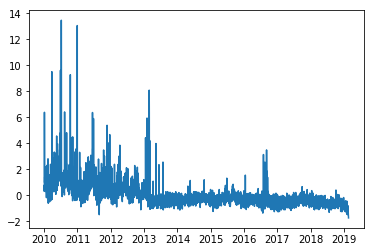

In [24]:
plt.plot(
    bklg_hr_to_res['created_dt']
    , StandardScaler().fit_transform(np.array(bklg_hr_to_res['hours_to_resolution']).reshape(-1, 1))
)

### standardize by year...

In [25]:
bklg_hr_to_res_2010 = bklg_hr_to_res[(bklg_hr_to_res['created_dt']>='2010-01-01')&(bklg_hr_to_res['created_dt']<='2010-12-31')]
bklg_hr_to_res_2010['hours_to_resolution_stdz'] = StandardScaler().fit_transform(np.array(bklg_hr_to_res_2010['hours_to_resolution']).reshape(-1, 1))
bklg_hr_to_res_2011 = bklg_hr_to_res[(bklg_hr_to_res['created_dt']>='2011-01-01')&(bklg_hr_to_res['created_dt']<='2011-12-31')]
bklg_hr_to_res_2011['hours_to_resolution_stdz'] = StandardScaler().fit_transform(np.array(bklg_hr_to_res_2011['hours_to_resolution']).reshape(-1, 1))
bklg_hr_to_res_2012 = bklg_hr_to_res[(bklg_hr_to_res['created_dt']>='2012-01-01')&(bklg_hr_to_res['created_dt']<='2012-12-31')]
bklg_hr_to_res_2012['hours_to_resolution_stdz'] = StandardScaler().fit_transform(np.array(bklg_hr_to_res_2012['hours_to_resolution']).reshape(-1, 1))
bklg_hr_to_res_2013 = bklg_hr_to_res[(bklg_hr_to_res['created_dt']>='2013-01-01')&(bklg_hr_to_res['created_dt']<='2013-12-31')]
bklg_hr_to_res_2013['hours_to_resolution_stdz'] = StandardScaler().fit_transform(np.array(bklg_hr_to_res_2013['hours_to_resolution']).reshape(-1, 1))
bklg_hr_to_res_2014 = bklg_hr_to_res[(bklg_hr_to_res['created_dt']>='2014-01-01')&(bklg_hr_to_res['created_dt']<='2014-12-31')]
bklg_hr_to_res_2014['hours_to_resolution_stdz'] = StandardScaler().fit_transform(np.array(bklg_hr_to_res_2014['hours_to_resolution']).reshape(-1, 1))
bklg_hr_to_res_2015 = bklg_hr_to_res[(bklg_hr_to_res['created_dt']>='2015-01-01')&(bklg_hr_to_res['created_dt']<='2015-12-31')]
bklg_hr_to_res_2015['hours_to_resolution_stdz'] = StandardScaler().fit_transform(np.array(bklg_hr_to_res_2015['hours_to_resolution']).reshape(-1, 1))
bklg_hr_to_res_2016 = bklg_hr_to_res[(bklg_hr_to_res['created_dt']>='2016-01-01')&(bklg_hr_to_res['created_dt']<='2016-12-31')]
bklg_hr_to_res_2016['hours_to_resolution_stdz'] = StandardScaler().fit_transform(np.array(bklg_hr_to_res_2016['hours_to_resolution']).reshape(-1, 1))
bklg_hr_to_res_2017 = bklg_hr_to_res[(bklg_hr_to_res['created_dt']>='2017-01-01')&(bklg_hr_to_res['created_dt']<='2017-12-31')]
bklg_hr_to_res_2017['hours_to_resolution_stdz'] = StandardScaler().fit_transform(np.array(bklg_hr_to_res_2017['hours_to_resolution']).reshape(-1, 1))
bklg_hr_to_res_2018 = bklg_hr_to_res[(bklg_hr_to_res['created_dt']>='2018-01-01')&(bklg_hr_to_res['created_dt']<='2018-12-31')]
bklg_hr_to_res_2018['hours_to_resolution_stdz'] = StandardScaler().fit_transform(np.array(bklg_hr_to_res_2018['hours_to_resolution']).reshape(-1, 1))
bklg_hr_to_res_2019 = bklg_hr_to_res[(bklg_hr_to_res['created_dt']>='2019-01-01')&(bklg_hr_to_res['created_dt']<='2019-12-31')]
bklg_hr_to_res_2019['hours_to_resolution_stdz'] = StandardScaler().fit_transform(np.array(bklg_hr_to_res_2019['hours_to_resolution']).reshape(-1, 1))

bklg_hr_to_res_stdz = pd.concat(
	[bklg_hr_to_res_2010
	, bklg_hr_to_res_2011
	, bklg_hr_to_res_2012
	, bklg_hr_to_res_2013
	, bklg_hr_to_res_2014
	, bklg_hr_to_res_2015
	, bklg_hr_to_res_2016
	, bklg_hr_to_res_2017
	, bklg_hr_to_res_2018
	, bklg_hr_to_res_2019]
)
bklg_hr_to_res_stdz.head()


/Users/sunghoonyang/PycharmProjects/ds_workspace/Noise Capstone/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sunghoonyang/PycharmProjects/ds_workspace/Noise Capstone/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sunghoonyang/PycharmProjects/ds_workspace/Noise Capstone/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,created_dt,hours_to_resolution,hours_to_resolution_stdz
0,2010-01-01,184.428571,-0.622252
1,2010-01-02,219.038462,-0.364848
2,2010-01-03,177.541667,-0.673472
3,2010-01-04,702.326531,3.229512
4,2010-01-05,331.920635,0.474691


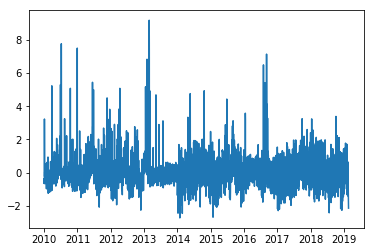

In [26]:
plt.plot(
    bklg_hr_to_res_stdz['created_dt']
    , bklg_hr_to_res_stdz['hours_to_resolution_stdz']
)

In [27]:
bklg_hr_to_res_stdz.drop(labels=['hours_to_resolution'], axis=1, inplace=True)
bklg_hr_to_res_stdz.head()

,created_dt,hours_to_resolution_stdz
0,2010-01-01,-0.622252
1,2010-01-02,-0.364848
2,2010-01-03,-0.673472
3,2010-01-04,3.229512
4,2010-01-05,0.474691


In [28]:
df = df.merge(
    bklg_hr_to_res_stdz
#     , right_index=True
#     , left_on = 'created_dt'
    , how='left'
)
df.head()

,created_dt,ntacode,complaint_cnt,wknd,holiday,hours_to_resolution_stdz
0,2010-01-01,MN14,2.0,0,1,-0.622252
1,2010-01-01,MN31,1.0,0,1,-0.622252
2,2010-01-01,MN32,1.0,0,1,-0.622252
3,2010-01-01,MN12,0.0,0,1,-0.622252
4,2010-01-01,MN20,0.0,0,1,-0.622252


## Temperature Data
Data from [NOAA](https://www.noaa.gov/)

In [29]:
tmp_1001_1304 = '/Users/sunghoonyang/Google Drive/Noise Capstone/data/temperature/201001-201304.csv'
tmp_1305_1704 = '/Users/sunghoonyang/Google Drive/Noise Capstone/data/temperature/201305-201704.csv'
tmp_1705_1903 = '/Users/sunghoonyang/Google Drive/Noise Capstone/data/temperature/201705-201903.csv'


def prc_csv(f):
    _df = pd.read_csv(
            f
            , header=0
            , parse_dates=['DATE']
        )
    _df = _df[_df['STATION'] == 'USW00094728'].fillna(0)
    return _df
    
tmp_df = pd.concat(
    [
        prc_csv(f) for f in [tmp_1001_1304, tmp_1305_1704, tmp_1705_1903]
    ], ignore_index = True
)


/Users/sunghoonyang/PycharmProjects/ds_workspace/Noise Capstone/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [30]:
# no null values
tmp_df = tmp_df[tmp_df.columns[np.where(~np.any(pd.isnull(tmp_df), axis=0))]]
tmp_df.head()

,AWND,DAPR,DATE,MDPR,NAME,PGTM,PRCP,SNOW,SNWD,STATION,TAVG,TMAX,TMIN,TOBS,TSUN,WDF2,WDF5,WESD,WESF,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
0,3.36,0.0,2010-01-01,0.0,"NY CITY CENTRAL PARK, NY US",2359.0,0.03,0.0,0.0,USW00094728,0.0,40.0,33.0,0.0,0.0,290.0,260.0,0.0,0.0,16.1,21.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12.53,0.0,2010-01-02,0.0,"NY CITY CENTRAL PARK, NY US",2349.0,0.02,0.2,0.0,USW00094728,0.0,34.0,17.0,0.0,0.0,270.0,280.0,0.0,0.0,21.9,34.9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.32,0.0,2010-01-03,0.0,"NY CITY CENTRAL PARK, NY US",1055.0,0.00,0.0,0.0,USW00094728,0.0,22.0,17.0,0.0,0.0,290.0,310.0,0.0,0.0,25.9,38.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10.74,0.0,2010-01-04,0.0,"NY CITY CENTRAL PARK, NY US",1722.0,0.00,0.0,0.0,USW00094728,0.0,30.0,19.0,0.0,0.0,290.0,280.0,0.0,0.0,17.0,23.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.84,0.0,2010-01-05,0.0,"NY CITY CENTRAL PARK, NY US",1047.0,0.00,0.0,0.0,USW00094728,0.0,30.0,20.0,0.0,0.0,290.0,270.0,0.0,0.0,17.0,23.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
tmp_df.drop(labels=['NAME', 'STATION'], axis=1, inplace=True)
tmp_df.head()


,AWND,DAPR,DATE,MDPR,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS,TSUN,WDF2,WDF5,WESD,WESF,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
0,3.36,0.0,2010-01-01,0.0,2359.0,0.03,0.0,0.0,0.0,40.0,33.0,0.0,0.0,290.0,260.0,0.0,0.0,16.1,21.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12.53,0.0,2010-01-02,0.0,2349.0,0.02,0.2,0.0,0.0,34.0,17.0,0.0,0.0,270.0,280.0,0.0,0.0,21.9,34.9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.32,0.0,2010-01-03,0.0,1055.0,0.00,0.0,0.0,0.0,22.0,17.0,0.0,0.0,290.0,310.0,0.0,0.0,25.9,38.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10.74,0.0,2010-01-04,0.0,1722.0,0.00,0.0,0.0,0.0,30.0,19.0,0.0,0.0,290.0,280.0,0.0,0.0,17.0,23.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.84,0.0,2010-01-05,0.0,1047.0,0.00,0.0,0.0,0.0,30.0,20.0,0.0,0.0,290.0,270.0,0.0,0.0,17.0,23.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df = df.merge(tmp_df, left_on='created_dt', right_on='DATE').drop(labels=['DATE'], axis=1)




### Create Autoregressive Features

In [33]:
def create_ar_feature(rd, df):
	"""
	rd: int date parameter for relativedelta. 
	returns 1 if success, else raise error
	"""
	rd = int(rd)
	df['created_dt_plus_%d' % rd] = df.created_dt.apply(lambda dt: dt + relativedelta(days=rd))
	x = df[['complaint_cnt', 'ntacode', 'created_dt_plus_%d' % rd]]
	df = df.merge(
	    x
	    , left_on=['created_dt', 'ntacode']
	    , right_on=['created_dt_plus_%d' % rd, 'ntacode']
	    , how='left'
	).drop(
	    labels=['created_dt_plus_%d_y' % rd, 'created_dt_plus_%d_x' % rd]
	    , axis=1
	).rename(
	    mapper={
            'complaint_cnt_x': 'complaint_cnt'
            , 'complaint_cnt_y': 'd-%d_cnt' % rd
        }
	    , axis=1
	)
	return df

for i in range(1, 28 + 1):
    df = create_ar_feature(i, df)


## Bring in AHV daily count feature

In [34]:
ahv = pd.read_csv(
    '/Users/sunghoonyang/Google Drive/Noise Capstone/data/daily_open_ahv_count.csv'
    , parse_dates=['basis_dt']
)
ahv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54226 entries, 0 to 54225
Data columns (total 3 columns):
basis_dt        54226 non-null datetime64[ns]
ahv_open_cnt    54226 non-null int64
ntacode         54226 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ MB


In [35]:
ahv.sort_values(by='basis_dt', axis=0, inplace=True)

In [36]:
df = df.merge(
    ahv
    , left_on=['created_dt', 'ntacode']        
    , right_on=['basis_dt', 'ntacode']
    , how='left'
)

##### Clean up first 28 days, and delete rows with 0

In [37]:
df = df.loc[
    np.min(df[df['created_dt'] >= ahv['basis_dt'][0]].index.tolist()):\
    np.max(df[df['created_dt'] <= ahv['basis_dt'].iloc[-1]].index.tolist())
        , ['created_dt', 'ntacode'] + \
            list(df.describe().columns[np.where(df.describe().loc['mean',:] >= 0.0)[0]])
]

In [38]:
df.head()

,created_dt,ntacode,complaint_cnt,wknd,holiday,hours_to_resolution_stdz,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS,TSUN,WDF2,WDF5,WESD,WESF,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11,d-1_cnt,d-2_cnt,d-3_cnt,d-4_cnt,d-5_cnt,d-6_cnt,d-7_cnt,d-8_cnt,d-9_cnt,d-10_cnt,d-11_cnt,d-12_cnt,d-13_cnt,d-14_cnt,d-15_cnt,d-16_cnt,d-17_cnt,d-18_cnt,d-19_cnt,d-20_cnt,d-21_cnt,d-22_cnt,d-23_cnt,d-24_cnt,d-25_cnt,d-26_cnt,d-27_cnt,d-28_cnt,ahv_open_cnt
11600,2011-02-05,MN14,1.0,1,0,-0.530954,5.59,0.0,0.0,2111.0,0.21,0.0,15.0,0.0,43.0,31.0,0.0,0.0,240.0,220.0,0.0,0.0,19.9,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN
11601,2011-02-05,MN31,3.0,1,0,-0.530954,5.59,0.0,0.0,2111.0,0.21,0.0,15.0,0.0,43.0,31.0,0.0,0.0,240.0,220.0,0.0,0.0,19.9,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,6.0,0.0,10.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0,2.0,2.0,1.0,6.0,0.0,1.0,0.0,2.0,0.0,NaN
11602,2011-02-05,MN32,0.0,1,0,-0.530954,5.59,0.0,0.0,2111.0,0.21,0.0,15.0,0.0,43.0,31.0,0.0,0.0,240.0,220.0,0.0,0.0,19.9,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN
11603,2011-02-05,MN12,2.0,1,0,-0.530954,5.59,0.0,0.0,2111.0,0.21,0.0,15.0,0.0,43.0,31.0,0.0,0.0,240.0,220.0,0.0,0.0,19.9,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,3.0,2.0,3.0,1.0,4.0,2.0,1.0,0.0,0.0,0.0,NaN
11604,2011-02-05,MN20,0.0,1,0,-0.530954,5.59,0.0,0.0,2111.0,0.21,0.0,15.0,0.0,43.0,31.0,0.0,0.0,240.0,220.0,0.0,0.0,19.9,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,3.0,0.0,0.0,10.0,4.0,4.0,2.0,4.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN


In [39]:
tmp_BKP = df.copy(deep=True)

## Normalize Data for Neural Net

In [40]:
df.fillna(0, inplace=True)
df.head()


,created_dt,ntacode,complaint_cnt,wknd,holiday,hours_to_resolution_stdz,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS,TSUN,WDF2,WDF5,WESD,WESF,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11,d-1_cnt,d-2_cnt,d-3_cnt,d-4_cnt,d-5_cnt,d-6_cnt,d-7_cnt,d-8_cnt,d-9_cnt,d-10_cnt,d-11_cnt,d-12_cnt,d-13_cnt,d-14_cnt,d-15_cnt,d-16_cnt,d-17_cnt,d-18_cnt,d-19_cnt,d-20_cnt,d-21_cnt,d-22_cnt,d-23_cnt,d-24_cnt,d-25_cnt,d-26_cnt,d-27_cnt,d-28_cnt,ahv_open_cnt
11600,2011-02-05,MN14,1.0,1,0,-0.530954,5.59,0.0,0.0,2111.0,0.21,0.0,15.0,0.0,43.0,31.0,0.0,0.0,240.0,220.0,0.0,0.0,19.9,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
11601,2011-02-05,MN31,3.0,1,0,-0.530954,5.59,0.0,0.0,2111.0,0.21,0.0,15.0,0.0,43.0,31.0,0.0,0.0,240.0,220.0,0.0,0.0,19.9,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,6.0,0.0,10.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0,2.0,2.0,1.0,6.0,0.0,1.0,0.0,2.0,0.0,0.0
11602,2011-02-05,MN32,0.0,1,0,-0.530954,5.59,0.0,0.0,2111.0,0.21,0.0,15.0,0.0,43.0,31.0,0.0,0.0,240.0,220.0,0.0,0.0,19.9,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
11603,2011-02-05,MN12,2.0,1,0,-0.530954,5.59,0.0,0.0,2111.0,0.21,0.0,15.0,0.0,43.0,31.0,0.0,0.0,240.0,220.0,0.0,0.0,19.9,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,3.0,2.0,3.0,1.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0
11604,2011-02-05,MN20,0.0,1,0,-0.530954,5.59,0.0,0.0,2111.0,0.21,0.0,15.0,0.0,43.0,31.0,0.0,0.0,240.0,220.0,0.0,0.0,19.9,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,3.0,0.0,0.0,10.0,4.0,4.0,2.0,4.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [41]:
spatial_bins = df['ntacode'].unique().size
dts = int(df.shape[0] / spatial_bins)
dts, spatial_bins

(2030, 29)

In [42]:
targets = df[['complaint_cnt']].copy(deep=True)
targets.head()

,complaint_cnt
11600,1.0
11601,3.0
11602,0.0
11603,2.0
11604,0.0


In [43]:
targets = np.array(targets).reshape(dts, spatial_bins * 1)
targets.shape

(2030, 29)

In [44]:
targets[0]

array([1., 3., 0., 2., 0., 1., 1., 0., 0., 0., 0., 0., 2., 0., 0., 0., 3.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.])

In [45]:
features = df[[c for c in df.columns if c not in ('created_dt', 'ntacode', 'complaint_cnt')]]

In [46]:
features.head()

,wknd,holiday,hours_to_resolution_stdz,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS,TSUN,WDF2,WDF5,WESD,WESF,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11,d-1_cnt,d-2_cnt,d-3_cnt,d-4_cnt,d-5_cnt,d-6_cnt,d-7_cnt,d-8_cnt,d-9_cnt,d-10_cnt,d-11_cnt,d-12_cnt,d-13_cnt,d-14_cnt,d-15_cnt,d-16_cnt,d-17_cnt,d-18_cnt,d-19_cnt,d-20_cnt,d-21_cnt,d-22_cnt,d-23_cnt,d-24_cnt,d-25_cnt,d-26_cnt,d-27_cnt,d-28_cnt,ahv_open_cnt
11600,1,0,-0.530954,5.59,0.0,0.0,2111.0,0.21,0.0,15.0,0.0,43.0,31.0,0.0,0.0,240.0,220.0,0.0,0.0,19.9,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
11601,1,0,-0.530954,5.59,0.0,0.0,2111.0,0.21,0.0,15.0,0.0,43.0,31.0,0.0,0.0,240.0,220.0,0.0,0.0,19.9,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,6.0,0.0,10.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0,2.0,2.0,1.0,6.0,0.0,1.0,0.0,2.0,0.0,0.0
11602,1,0,-0.530954,5.59,0.0,0.0,2111.0,0.21,0.0,15.0,0.0,43.0,31.0,0.0,0.0,240.0,220.0,0.0,0.0,19.9,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
11603,1,0,-0.530954,5.59,0.0,0.0,2111.0,0.21,0.0,15.0,0.0,43.0,31.0,0.0,0.0,240.0,220.0,0.0,0.0,19.9,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,3.0,2.0,3.0,1.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0
11604,1,0,-0.530954,5.59,0.0,0.0,2111.0,0.21,0.0,15.0,0.0,43.0,31.0,0.0,0.0,240.0,220.0,0.0,0.0,19.9,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,3.0,0.0,0.0,10.0,4.0,4.0,2.0,4.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [47]:
features_np = StandardScaler().fit_transform(features)
features_stdz = pd.DataFrame(
    features_np
    , columns=features.columns
)
features_stdz.head()

/Users/sunghoonyang/PycharmProjects/ds_workspace/Noise Capstone/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/sunghoonyang/PycharmProjects/ds_workspace/Noise Capstone/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,wknd,holiday,hours_to_resolution_stdz,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS,TSUN,WDF2,WDF5,WESD,WESF,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11,d-1_cnt,d-2_cnt,d-3_cnt,d-4_cnt,d-5_cnt,d-6_cnt,d-7_cnt,d-8_cnt,d-9_cnt,d-10_cnt,d-11_cnt,d-12_cnt,d-13_cnt,d-14_cnt,d-15_cnt,d-16_cnt,d-17_cnt,d-18_cnt,d-19_cnt,d-20_cnt,d-21_cnt,d-22_cnt,d-23_cnt,d-24_cnt,d-25_cnt,d-26_cnt,d-27_cnt,d-28_cnt,ahv_open_cnt
0,1.579233,-0.150566,-0.523608,0.107604,0.0,0.0,3.90037,0.207273,-0.093056,7.447692,0.0,-1.20886,-1.168043,0.0,0.0,0.452255,0.236286,0.0,0.0,1.419433,1.105861,1.448874,5.77986,0.0,-0.04969,0.0,-0.058824,1.93755,0.0,-0.0222,-0.054409,-0.678413,-0.365704,-0.052903,-0.364801,-0.676902,-0.676595,-0.051068,-0.362986,-0.050179,-0.362176,-0.674027,-0.673530,-0.673262,-0.672701,-0.046703,-0.359266,-0.671618,-0.671181,-0.357729,-0.357459,-0.670058,-0.669689,-0.355967,-0.355679,-0.668450,-0.668321,-0.668131,-0.50966
1,1.579233,-0.150566,-0.523608,0.107604,0.0,0.0,3.90037,0.207273,-0.093056,7.447692,0.0,-1.20886,-1.168043,0.0,0.0,0.452255,0.236286,0.0,0.0,1.419433,1.105861,1.448874,5.77986,0.0,-0.04969,0.0,-0.058824,1.93755,0.0,-0.0222,0.570154,-0.678413,-0.365704,-0.052903,-0.052266,-0.364435,-0.364098,-0.051068,1.199736,-0.675180,2.450534,-0.674027,-0.673530,-0.673262,-0.672701,-0.046703,0.266390,-0.671618,-0.358164,-0.044646,-0.044333,-0.356905,1.209269,-0.669142,-0.355679,-0.668450,-0.041359,-0.668131,-0.50966
2,1.579233,-0.150566,-0.523608,0.107604,0.0,0.0,3.90037,0.207273,-0.093056,7.447692,0.0,-1.20886,-1.168043,0.0,0.0,0.452255,0.236286,0.0,0.0,1.419433,1.105861,1.448874,5.77986,0.0,-0.04969,0.0,-0.058824,1.93755,0.0,-0.0222,-0.678973,-0.366098,-0.053309,0.259503,-0.052266,-0.676902,-0.676595,-0.676091,-0.675530,-0.675180,-0.674699,-0.674027,-0.673530,-0.673262,-0.672701,-0.672357,-0.359266,-0.358690,-0.671181,-0.670812,-0.357459,-0.356905,-0.669689,-0.669142,-0.668918,-0.355143,-0.354840,-0.354589,-0.50966
3,1.579233,-0.150566,-0.523608,0.107604,0.0,0.0,3.90037,0.207273,-0.093056,7.447692,0.0,-1.20886,-1.168043,0.0,0.0,0.452255,0.236286,0.0,0.0,1.419433,1.105861,1.448874,5.77986,0.0,-0.04969,0.0,-0.058824,1.93755,0.0,-0.0222,-0.054409,-0.053784,-0.365704,-0.365308,-0.052266,-0.364435,-0.676595,-0.363579,-0.362986,-0.675180,-0.362176,-0.674027,-0.360913,-0.047878,-0.672701,-0.359530,-0.046438,-0.671618,0.267869,-0.044646,0.268793,-0.356905,0.582949,-0.042792,-0.355679,-0.668450,-0.668321,-0.668131,-0.50966
4,1.579233,-0.150566,-0.523608,0.107604,0.0,0.0,3.90037,0.207273,-0.093056,7.447692,0.0,-1.20886,-1.168043,0.0,0.0,0.452255,0.236286,0.0,0.0,1.419433,1.105861,1.448874,5.77986,0.0,-0.04969,0.0,-0.058824,1.93755,0.0,-0.0222,-0.366691,-0.053784,-0.365704,0.571909,-0.052266,-0.676902,0.260895,-0.676091,-0.675530,2.449824,0.575394,0.576100,-0.048297,0.577505,-0.047187,-0.672357,-0.046438,-0.358690,-0.358164,-0.670812,-0.670585,0.582554,-0.669689,-0.669142,-0.668918,-0.668450,-0.668321,-0.041047,-0.50966


<Figure size 432x288 with 0 Axes>

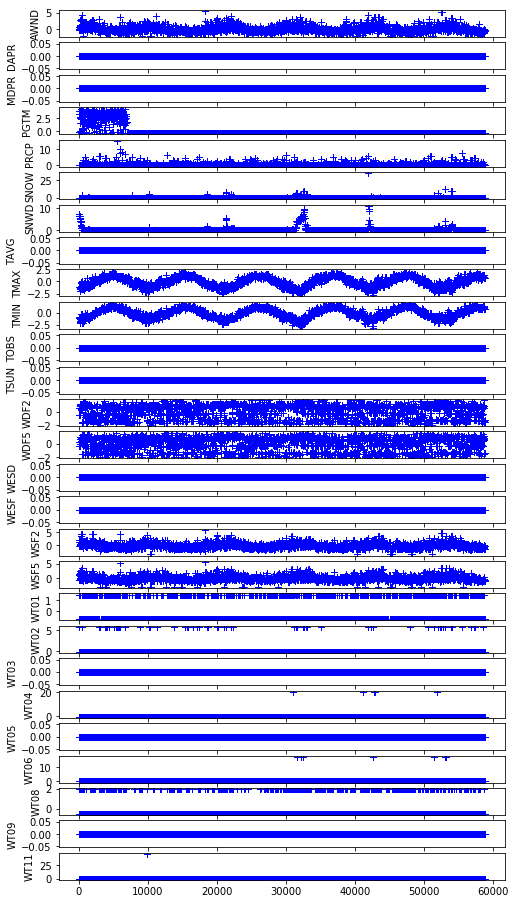

In [48]:
cs = ['AWND'
, 'DAPR'
, 'MDPR'
, 'PGTM'
, 'PRCP'
, 'SNOW'
, 'SNWD'
, 'TAVG'
, 'TMAX'
, 'TMIN'
, 'TOBS'
, 'TSUN'
, 'WDF2'
, 'WDF5'
, 'WESD'
, 'WESF'
, 'WSF2'
, 'WSF5'
, 'WT01'
, 'WT02'
, 'WT03'
, 'WT04'
, 'WT05'
, 'WT06'
, 'WT08'
, 'WT09'
, 'WT11']

plt.clf()
fig, axs = plt.subplots(len(cs), 1, figsize=(8, 16), sharex=True)
for i, c in enumerate(cs):
    axs[i].plot(features_stdz[c], 'b+')
    axs[i].set_ylabel(c)


### deleting all weather data except for 
```python
[
	'AWND'
	, 'PRCP'
	, 'SNOW'
	, 'SNWD'
	, 'TMAX'
	, 'WDF5'
	, 'WSF5'
	, 'WT01'
	, 'WT02'
	, 'WT04'
	, 'WT08'
]
```

In [49]:
keep_cols = [
    'AWND'
    , 'PRCP'
    , 'SNOW'
    , 'SNWD'
    , 'TMAX'
    , 'WDF5'
    , 'WSF5'
    , 'WT01'
    , 'WT02'
    , 'WT04'
    , 'WT08'
]

In [50]:
drop_tmp_cols = [c for c in cs if c not in keep_cols]
features_stdz.drop(labels=drop_tmp_cols, axis=1, inplace=True)
features_stdz.head()

,wknd,holiday,hours_to_resolution_stdz,AWND,PRCP,SNOW,SNWD,TMAX,WDF5,WSF5,WT01,WT02,WT04,WT08,d-1_cnt,d-2_cnt,d-3_cnt,d-4_cnt,d-5_cnt,d-6_cnt,d-7_cnt,d-8_cnt,d-9_cnt,d-10_cnt,d-11_cnt,d-12_cnt,d-13_cnt,d-14_cnt,d-15_cnt,d-16_cnt,d-17_cnt,d-18_cnt,d-19_cnt,d-20_cnt,d-21_cnt,d-22_cnt,d-23_cnt,d-24_cnt,d-25_cnt,d-26_cnt,d-27_cnt,d-28_cnt,ahv_open_cnt
0,1.579233,-0.150566,-0.523608,0.107604,0.207273,-0.093056,7.447692,-1.20886,0.236286,1.105861,1.448874,5.77986,-0.04969,1.93755,-0.054409,-0.678413,-0.365704,-0.052903,-0.364801,-0.676902,-0.676595,-0.051068,-0.362986,-0.050179,-0.362176,-0.674027,-0.673530,-0.673262,-0.672701,-0.046703,-0.359266,-0.671618,-0.671181,-0.357729,-0.357459,-0.670058,-0.669689,-0.355967,-0.355679,-0.668450,-0.668321,-0.668131,-0.50966
1,1.579233,-0.150566,-0.523608,0.107604,0.207273,-0.093056,7.447692,-1.20886,0.236286,1.105861,1.448874,5.77986,-0.04969,1.93755,0.570154,-0.678413,-0.365704,-0.052903,-0.052266,-0.364435,-0.364098,-0.051068,1.199736,-0.675180,2.450534,-0.674027,-0.673530,-0.673262,-0.672701,-0.046703,0.266390,-0.671618,-0.358164,-0.044646,-0.044333,-0.356905,1.209269,-0.669142,-0.355679,-0.668450,-0.041359,-0.668131,-0.50966
2,1.579233,-0.150566,-0.523608,0.107604,0.207273,-0.093056,7.447692,-1.20886,0.236286,1.105861,1.448874,5.77986,-0.04969,1.93755,-0.678973,-0.366098,-0.053309,0.259503,-0.052266,-0.676902,-0.676595,-0.676091,-0.675530,-0.675180,-0.674699,-0.674027,-0.673530,-0.673262,-0.672701,-0.672357,-0.359266,-0.358690,-0.671181,-0.670812,-0.357459,-0.356905,-0.669689,-0.669142,-0.668918,-0.355143,-0.354840,-0.354589,-0.50966
3,1.579233,-0.150566,-0.523608,0.107604,0.207273,-0.093056,7.447692,-1.20886,0.236286,1.105861,1.448874,5.77986,-0.04969,1.93755,-0.054409,-0.053784,-0.365704,-0.365308,-0.052266,-0.364435,-0.676595,-0.363579,-0.362986,-0.675180,-0.362176,-0.674027,-0.360913,-0.047878,-0.672701,-0.359530,-0.046438,-0.671618,0.267869,-0.044646,0.268793,-0.356905,0.582949,-0.042792,-0.355679,-0.668450,-0.668321,-0.668131,-0.50966
4,1.579233,-0.150566,-0.523608,0.107604,0.207273,-0.093056,7.447692,-1.20886,0.236286,1.105861,1.448874,5.77986,-0.04969,1.93755,-0.366691,-0.053784,-0.365704,0.571909,-0.052266,-0.676902,0.260895,-0.676091,-0.675530,2.449824,0.575394,0.576100,-0.048297,0.577505,-0.047187,-0.672357,-0.046438,-0.358690,-0.358164,-0.670812,-0.670585,0.582554,-0.669689,-0.669142,-0.668918,-0.668450,-0.668321,-0.041047,-0.50966


## Drop columns that do not have values

In [51]:
features_stdz.drop(
    labels=features_stdz.corr().max(axis=1)[np.where(np.isnan(features_stdz.corr().max(axis=1)))[0]].index.tolist()
    , axis=1
    , inplace=True
)


### Inspect Hessian

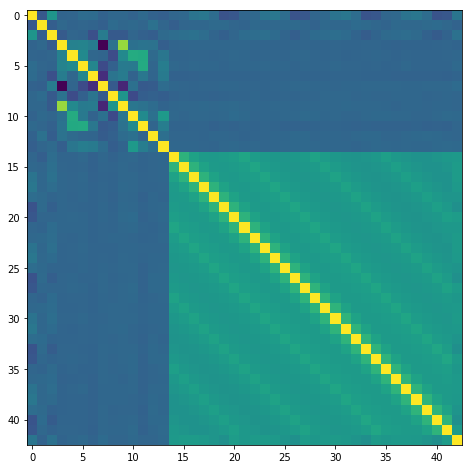

In [52]:
fig = plt.figure(figsize=(8, 8))
plt.clf()
plt.imshow(features_stdz.corr())

In [53]:
features_stdz.head()

,wknd,holiday,hours_to_resolution_stdz,AWND,PRCP,SNOW,SNWD,TMAX,WDF5,WSF5,WT01,WT02,WT04,WT08,d-1_cnt,d-2_cnt,d-3_cnt,d-4_cnt,d-5_cnt,d-6_cnt,d-7_cnt,d-8_cnt,d-9_cnt,d-10_cnt,d-11_cnt,d-12_cnt,d-13_cnt,d-14_cnt,d-15_cnt,d-16_cnt,d-17_cnt,d-18_cnt,d-19_cnt,d-20_cnt,d-21_cnt,d-22_cnt,d-23_cnt,d-24_cnt,d-25_cnt,d-26_cnt,d-27_cnt,d-28_cnt,ahv_open_cnt
0,1.579233,-0.150566,-0.523608,0.107604,0.207273,-0.093056,7.447692,-1.20886,0.236286,1.105861,1.448874,5.77986,-0.04969,1.93755,-0.054409,-0.678413,-0.365704,-0.052903,-0.364801,-0.676902,-0.676595,-0.051068,-0.362986,-0.050179,-0.362176,-0.674027,-0.673530,-0.673262,-0.672701,-0.046703,-0.359266,-0.671618,-0.671181,-0.357729,-0.357459,-0.670058,-0.669689,-0.355967,-0.355679,-0.668450,-0.668321,-0.668131,-0.50966
1,1.579233,-0.150566,-0.523608,0.107604,0.207273,-0.093056,7.447692,-1.20886,0.236286,1.105861,1.448874,5.77986,-0.04969,1.93755,0.570154,-0.678413,-0.365704,-0.052903,-0.052266,-0.364435,-0.364098,-0.051068,1.199736,-0.675180,2.450534,-0.674027,-0.673530,-0.673262,-0.672701,-0.046703,0.266390,-0.671618,-0.358164,-0.044646,-0.044333,-0.356905,1.209269,-0.669142,-0.355679,-0.668450,-0.041359,-0.668131,-0.50966
2,1.579233,-0.150566,-0.523608,0.107604,0.207273,-0.093056,7.447692,-1.20886,0.236286,1.105861,1.448874,5.77986,-0.04969,1.93755,-0.678973,-0.366098,-0.053309,0.259503,-0.052266,-0.676902,-0.676595,-0.676091,-0.675530,-0.675180,-0.674699,-0.674027,-0.673530,-0.673262,-0.672701,-0.672357,-0.359266,-0.358690,-0.671181,-0.670812,-0.357459,-0.356905,-0.669689,-0.669142,-0.668918,-0.355143,-0.354840,-0.354589,-0.50966
3,1.579233,-0.150566,-0.523608,0.107604,0.207273,-0.093056,7.447692,-1.20886,0.236286,1.105861,1.448874,5.77986,-0.04969,1.93755,-0.054409,-0.053784,-0.365704,-0.365308,-0.052266,-0.364435,-0.676595,-0.363579,-0.362986,-0.675180,-0.362176,-0.674027,-0.360913,-0.047878,-0.672701,-0.359530,-0.046438,-0.671618,0.267869,-0.044646,0.268793,-0.356905,0.582949,-0.042792,-0.355679,-0.668450,-0.668321,-0.668131,-0.50966
4,1.579233,-0.150566,-0.523608,0.107604,0.207273,-0.093056,7.447692,-1.20886,0.236286,1.105861,1.448874,5.77986,-0.04969,1.93755,-0.366691,-0.053784,-0.365704,0.571909,-0.052266,-0.676902,0.260895,-0.676091,-0.675530,2.449824,0.575394,0.576100,-0.048297,0.577505,-0.047187,-0.672357,-0.046438,-0.358690,-0.358164,-0.670812,-0.670585,0.582554,-0.669689,-0.669142,-0.668918,-0.668450,-0.668321,-0.041047,-0.50966


In [54]:
ar_features_stdz = features_stdz.drop(
    labels=[c for c in features_stdz.columns if not c.startswith('d-')]
    , axis=1
)

## Write to file 

In [55]:
features_stdz.to_csv('/Users/sunghoonyang/Google Drive/Noise Capstone/data/LSTM_dataset.csv', index=False)


In [56]:
ar_features_stdz.to_csv('/Users/sunghoonyang/Google Drive/Noise Capstone/data/LSTM_ar_dataset.csv', index=False)


In [57]:
pd.DataFrame(targets).to_csv('/Users/sunghoonyang/Google Drive/Noise Capstone/data/LSTM_dataset_labels.csv', index=False)
